
# <p style="text-align: center;"> MODELADO DE OBJETOS AUTOGRAVITANTES</p>

### <p style="text-align: center;">Camilo Parra, William Romero</p>

#### <p style="text-align: center;">Junio de 2023</p>

In [2]:
from scipy.integrate import odeint, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

## Pregunta de Investigación

La intención de este trabajo es entender , o al menos intuir **¿Cual es la incidencia de los fluidos no pascalianos en la estructura estelar newtoniana y relativistas?**. Esto es, supondremos un perfil de densidad y una forma particular de la distribución de presiones radiales y tangenciales. A partir de esas suposiciones compararemos los perfiles de presión para un espacio de parámetros.

## ¿Qué y cómo hacerlo?

Como lo planteamos inicialmente la intención es entender, o al menos intruir, **el efecto que induce la anisotropía de las presiones en los modelos estelares, tanto newtonianos como relativistas**. Para responder esa pregunta se propone construir dos modelos: **Newtonianos y relativistas** para distintos valores de los parámetros involucrados. 

Para el modelo newtoniano se deben integrar las ecuaciones:

$$ \frac{\delta P(r)}{dr} = - \frac{G m(r) \rho(r) } { r^{2} } + 2 \frac{P_{\perp} - P(r)}{r} \\[1cm]\frac{\delta m(r) }{\delta r} = 4\pi^{2}\rho(r)  $$ 

Mientras que para el modelo relativista se deben integrar las siguientes ecuaciones:;

$$ \frac{\delta P(r)}{dr} = - \frac{G m(r) \rho(r) }{r^{2}} \left(1 + \frac{P(r)}{\rho(r)c^{2}}\right) \left(1 + \frac{4\pi^{3}}{}\right) \left(1 + \frac{P(r)}{\rho(r)c^{2}}\right) \left(1 - 2 \frac{G m(r) }{ rc^{2} }\right)^{-1} + 2 \frac{P_{\perp}(r) - P(r)}{r} \\[1cm] \frac{\delta m(r)}{dr} = 4\pi r^{2} \rho(r)$$

utilizando el perfil de de densidad

$$ \bar{p} = (1-B\bar{r}^{2}) $$

De esta manera, para el **modelo newtoniano**, usando  la estrategia 1,tenemos las condiciones iniciales:

$$ \rho(r) = \bar{\rho} \rho_{0}, \quad m(r) = \bar{m} M \quad P(r) = \bar{P} P_{0} \quad r = \bar{r} R$$

Los parámetros auxiliares adimensionales son los siguientes:

$$ \mu = \frac{M \times G}{R \times c^2}, \quad k = \frac{P_0}{\rho_{0}c^2}, \quad \eta = \frac{\rho_{0}}{\bar{\rho}} \quad \bar{\rho} = \frac{M}{\frac{4\pi}{3}R^3} $$

Así, el despeje queda de la siguiente manera:

$$ \frac{\delta P(r)}{\delta r}  = \frac{h \times m(r) \times \rho(r)}{r^2} \\[0.5cm]$$

$$ \frac{\delta \bar{P}}{\delta \bar{r}} \frac{\delta \rho_{0}}{R} = h \frac{\bar{m}M\bar{\rho}\rho_{0}}{\bar{r}^{2}R^2} \frac{c^2}{c^2} \frac{G}{G} \\[0.5cm]$$

$$ \frac{\delta \bar{P}}{\delta \bar{r}} = h \frac{\rho_{0} c^2 }{ P_{0} } \frac{MG}{R c^2} \frac{\bar{m}}{\bar{r}^2} \\[0.5cm]$$

$$ \frac{\delta \bar{P}}{\delta \bar{r}} = \frac{h \times \mu \times \bar{m}}{G \times k \times r^{2}} - \left(\frac{5}{3} - \frac{5}{h} \right) \frac{h \times \mu \times \bar{m}}{G \times k \times \bar{r}^{2}} \bar{r}^{2} \\[0.5cm]$$


$$ \frac{\delta \bar{P}}{\delta \bar{r}} = \frac{h \times \mu \times \bar{m}}{G \times k \times r^2} ( 1 - \beta \bar{r}^{2})\\[0.5cm]$$

$$ \frac{\delta \bar{m}}{\delta \bar{r}} = \eta \bar{r}^2 ( 1 - \beta \bar{r}^{2}) $$

Así al resolver la integral obtenemos los siguientes resultados:

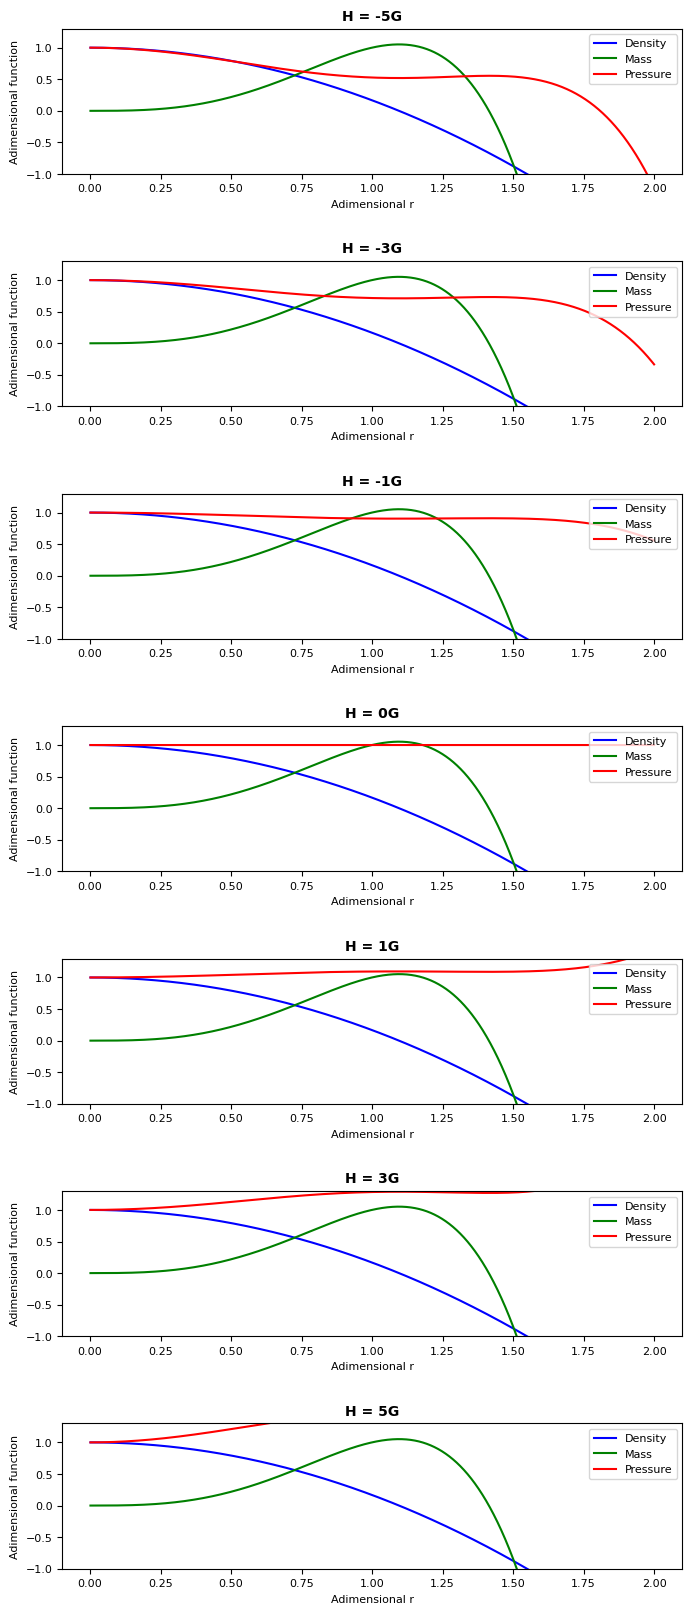

In [3]:
# constants
u = 1
k = 5
n = 6
B = 5/3 * (1 - 3/n) 
G = 6.67430e-11 # meters cubed per kilogram second squared

def odes(r, x):
    # assign each ODE to a vector element
    P = x[0]
    m = x[1]

    # define each ODE
    dPdr = (1 - B * pow(r, 2)) * (h * u * m) / (G * k * pow(r, 2))
    dmdr = (1 - B * pow(r, 2)) * n * pow(r, 2)

    return [dPdr, dmdr]

# initial conditions
x0 = [1, 0]

# declare a time vector (time window)
r = np.linspace(0.001,2,10000)

# It only makes sense to represent h as multiples of G because it holds the same degree of magnitud according to G units
h_values = [-5*G, -3*G, -1*G, 0*G, 1*G, 3*G, 5*G]
g_values = [-5, -3, -1, 0, 1, 3, 5]
pressure_values = []
mass_values = []
density_values = []

for h in h_values:
    x = solve_ivp(odes, t_eval = r , y0 = x0, t_span=[0.001, 2])
    density_values.append(1 - B * pow(r, 2))
    pressure_values.append(x.y[0])
    mass_values.append(x.y[1])

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(8, 20), gridspec_kw={'hspace': 0.6})

for i, g_value in enumerate(g_values):
    axs[i].plot(r, density_values[i], label='Density', color='blue')
    axs[i].plot(r, mass_values[i], label='Mass', color='green')
    axs[i].plot(r, pressure_values[i], label='Pressure', color='red')
    axs[i].set_title(f'H = {g_value}G', fontsize=10, fontweight='bold')
    axs[i].set_xlabel('Adimensional r', fontsize=8)
    axs[i].set_ylabel('Adimensional function', fontsize=8)
    axs[i].set_ylim(-1, 1.3)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

    # Add a legend to the plot
    axs[i].legend(loc='upper right', fontsize=8)


Por su parte, el modelo relativista se desarrolla de la siiguiente manera:


al hacer el despeje obtenemos que

$$ \frac{\delta \bar{P}}{\delta \bar{r}}  = \frac{h \times \mu \times \bar{m}}{G \times K \times r^{2}}
(1 - \beta \bar{r}^{2}) \left( 1 + \frac{k \bar{P}}{(1 - \beta \bar{r}^{2})}  \right)
\left( 1 + \frac{3 \eta k \bar{P} r^3}{\bar{m}}  \right) \left( 1 - \frac{2 \mu k \bar{m}}{\bar{r}}  \right)^{-1} \\[1cm] $$ 

$$ \frac{\delta \bar{m} }{\delta \bar{r}} = R \bar{r}^2 ( 1 - \beta \bar{r}^{2})$$

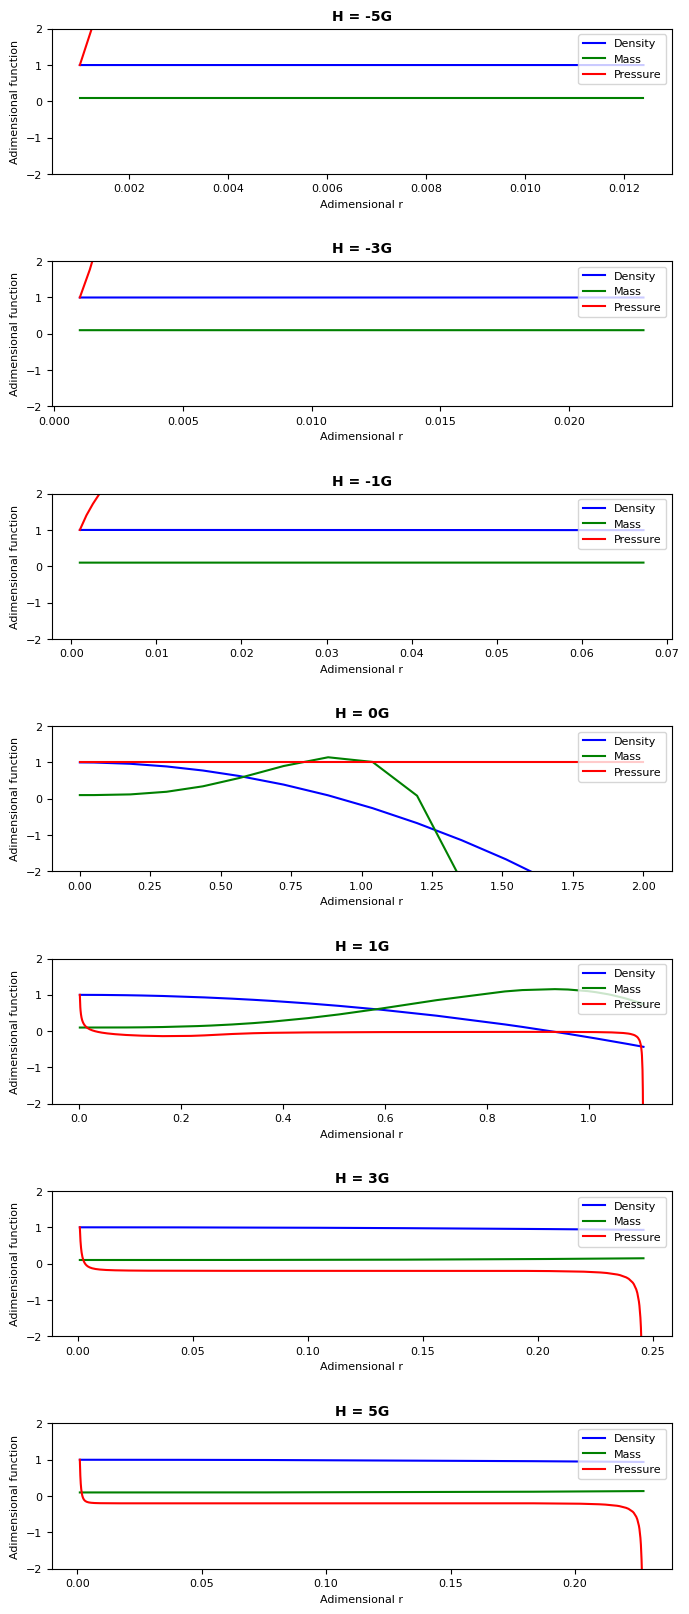

In [4]:
# constants
u = 1
k = 5
n = 10
B = 5/3 * (1 - 3/n) 
G = 6.67430e-11 # meters cubed per kilogram second squared

def odes(r, x):
    # assign each ODE to a vector element
    P = x[0]
    m = x[1]

    # define each ODE
    dPdr = (1 - B * pow(r, 2)) * (h * u * m) / (G * k * pow(r, 2)) * (1 + (k * P)/(1 - B * pow(r, 2))) * (1 + 3 * n * k * P * pow(r, 3) / m) / (1 - 2 * u * m / r)
    dmdr = (1 - B * pow(r, 2)) * n * pow(r, 2)

    return [dPdr, dmdr]

# initial conditions
x0 = [1, 0.1]

# declare a time vector (time window)
r = np.linspace(0.001, 2, 1000)

# It only makes sense to represent h as multiples of G because it holds the same degree of magnitud according to G units
h_values = [-5*G, -3*G, -1*G, 0*G, 1*G, 3*G, 5*G]
g_values = [-5, -3, -1, 0, 1, 3, 5]
pressure_values = []
mass_values = []
density_values = []
r_values = []


for h in h_values:
    x = solve_ivp(odes, y0 = x0, t_span=[0.001, 2], method='Radau')
    r_values.append(x.t)
    density_values.append(1 - B * pow(x.t, 2))
    pressure_values.append(x.y[0])
    mass_values.append(x.y[1])

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(8, 20), gridspec_kw={'hspace': 0.6})

for i, g_value in enumerate(g_values):
    axs[i].plot(r_values[i], density_values[i], label='Density', color='blue')
    axs[i].plot(r_values[i], mass_values[i], label='Mass', color='green')
    axs[i].plot(r_values[i], pressure_values[i], label='Pressure', color='red')
    axs[i].set_title(f'H = {g_value}G', fontsize=10, fontweight='bold')
    axs[i].set_xlabel('Adimensional r', fontsize=8)
    axs[i].set_ylabel('Adimensional function', fontsize=8)
    axs[i].set_ylim(-2, 2)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

    # Add a legend to the plot
    axs[i].legend(loc='upper right', fontsize=8)